In [11]:
# To datoteko uporabljam le zato, da ohranjam spremenljivke medtem ko spreminjam izgled grafov

from functions import *
from scipy import fftpack
from numpy import linspace, fft


def timeComplexity(h, N, M):
    t = linspace(-1, 1, N)
    ti = linspace(-1, 1, M)

    x = h(t)
    x = x.reshape(-1, 1)

    time0 = time.time()
    X = fft.fft(x, axis=0)
    time1 = time.time()
    X = DFT(x)
    time2 = time.time()
    X = fftpack.fft(x, axis=0)
    time3 = time.time()

    return time1 - time0, time2 - time1, time3 - time2



In [16]:

import numpy as np
import time
np.random.seed(42)

timesNumpy = []
timesDFT = []
timesScipy = []
for i in range(1, 10000, 100):
    print(i//100)
    num_freq = np.random.randint(1, 50)

    def h(x): return sum([A * np.sin(omega * x) for omega, A in zip(
        [i for i in range(num_freq)], np.random.uniform(0.1, 1, num_freq))])

    timeNumpy, timeDFT, timeScipy = timeComplexity(h, i, 2*i)
    timesNumpy.append(timeNumpy)
    timesDFT.append(timeDFT)
    timesScipy.append(timeScipy)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


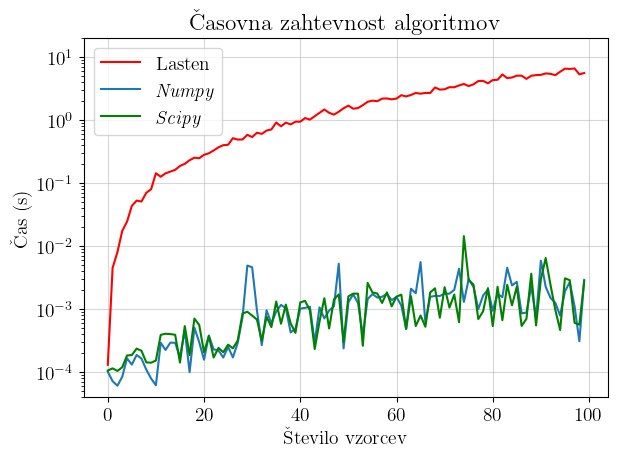

In [31]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif",
    "font.size": 14
})

plt.plot(timesDFT, label='Lasten', c='r')
plt.plot(timesNumpy, label=r'\textit{Numpy}', c='C0')
plt.plot(timesScipy, label=r'\textit{Scipy}', c='g')
plt.ylabel('Čas (s)')
plt.xlabel('Število vzorcev')
plt.title('Časovna zahtevnost algoritmov')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(4e-5, 2e1)
plt.tight_layout()
plt.show()